In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN


In [3]:
df1 = pd.read_csv('/Users/jluisfeltrer/Desktop/Analisis de datos/data_analysis_curso/e-cmn/E-commerce_mkechinov/merged_2019_C1.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.4+ GB


In [4]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### Primera parte: Eliminar columnas innecesarias

In [5]:
# Eliminar las columnas 'user_session', 'event_time' y 'category_id' in place true
df1.drop(columns=['event_time', 'category_id', 'user_session'], inplace=True)

In [6]:
df1.head()

,event_type,product_id,category_code,brand,price,user_id
0,view,1003461,electronics.smartphone,xiaomi,489.07,520088904
1,view,5000088,appliances.sewing_machine,janome,293.65,530496790
2,view,17302664,NaN,creed,28.31,561587266
3,view,3601530,appliances.kitchen.washer,lg,712.87,518085591
4,view,1004775,electronics.smartphone,xiaomi,183.27,558856683


### Analisis inicial por columna

In [8]:
# Cuantos valores unicos hay en cada columna
df1.nunique()

event_type             3
product_id        206876
category_code        129
brand               4302
price              82966
user_id          5316649
dtype: int64

In [ ]:
# Cuantos valores unicos hay en la columna 'user_id'
df1['user_id'].nunique()

5316649

In [11]:
# Cuenta los valores unicos de la columna event_type
df1['event_type'].value_counts()

event_type
view        104335509
cart          3955446
purchase      1659788
Name: count, dtype: int64

In [9]:
# Porcentaje de cada valor unico en la columna event_type
df1['event_type'].value_counts(normalize=True)

event_type
view        0.948930
cart        0.035975
purchase    0.015096
Name: proportion, dtype: float64

In [9]:
# crea un df con los porcentajes de cada valor unico en la columna event_type
event_type_counts = df1['event_type'].value_counts(normalize=True).reset_index()
event_type_counts.columns = ['event_type', 'percentage']

/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_38277/2450843099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='event_type', data=event_type_counts, palette='viridis')


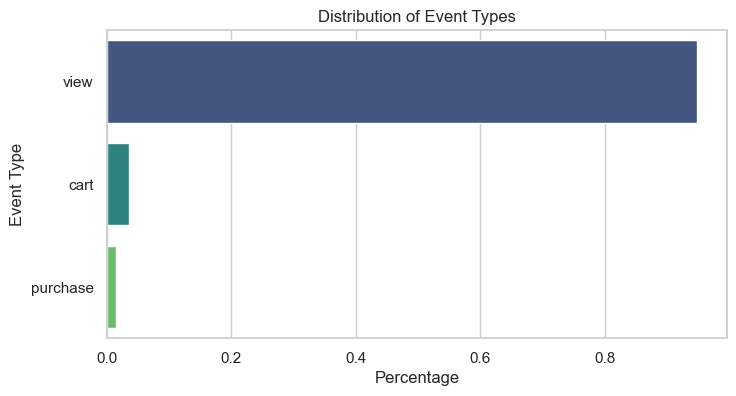

In [13]:
# visualizar los datos de event_type_counts en un barplot, barras horizontales
plt.figure(figsize=(8, 4))
sns.barplot(x='percentage', y='event_type', data=event_type_counts, palette='viridis')
plt.title('Distribution of Event Types')
plt.xlabel('Percentage')
plt.ylabel('Event Type')
plt.show()  

In [8]:
# Agrupa los valores por 'brand', numero y porcentaje de eventos por marca
brand_counts = df1['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']
brand_counts['percentage'] = brand_counts['count'] / brand_counts['count'].sum()


In [15]:
brand_counts.sort_values(by='count', ascending=False, inplace=True)

In [16]:
brand_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4301
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       4302 non-null   object 
 1   count       4302 non-null   int64  
 2   percentage  4302 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.4+ KB


In [19]:
brand_counts.head()

,brand,count,percentage
0,samsung,13172020,0.139225
1,apple,10381933,0.109734
2,xiaomi,7721825,0.081618
3,huawei,2521331,0.026650
4,lucente,1840936,0.019458


In [16]:
# multiplicar la columna 'percentage' por 100 para que sea un porcentaje
brand_counts['percentage'] = brand_counts['percentage'] * 100

In [17]:
brand_counts.head(10).round(2)

,brand,count,percentage
0,samsung,13172020,13.92
1,apple,10381933,10.97
2,xiaomi,7721825,8.16
3,huawei,2521331,2.66
4,lucente,1840936,1.95
5,lg,1659394,1.75
6,bosch,1532149,1.62
7,oppo,1294585,1.37
8,sony,1255101,1.33
9,acer,1127129,1.19


/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_43354/1221008670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='brand', data=brand_counts.head(10), palette='viridis')


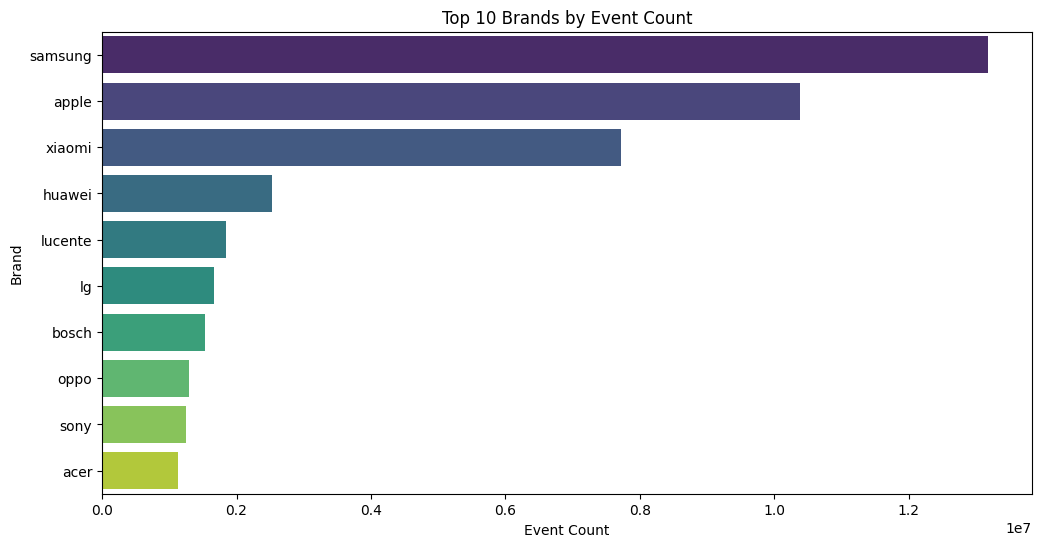

In [10]:
# Graficar las 10 marcas con mas eventos
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='brand', data=brand_counts.head(10), palette='viridis')
plt.title('Top 10 Brands by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Brand')
plt.show()  

In [18]:
df1.head()

,event_type,product_id,category_code,brand,price,user_id
0,view,1003461,electronics.smartphone,xiaomi,489.07,520088904
1,view,5000088,appliances.sewing_machine,janome,293.65,530496790
2,view,17302664,NaN,creed,28.31,561587266
3,view,3601530,appliances.kitchen.washer,lg,712.87,518085591
4,view,1004775,electronics.smartphone,xiaomi,183.27,558856683


In [26]:
# sacar en un df las 10 categorias con mas eventos
category_counts = df1['category_code'].value_counts().reset_index()
category_counts.columns = ['category_code', 'count']
category_counts['percentage'] = category_counts['count'] / category_counts['count'].sum()
category_counts.sort_values(by='count', ascending=False, inplace=True)
category_counts['percentage'] = category_counts['percentage'] * 100


In [27]:
category_counts.head(10).round(2)

,category_code,count,percentage
0,electronics.smartphone,27882231,37.41
1,electronics.clocks,3397999,4.56
2,electronics.video.tv,3321796,4.46
3,computers.notebook,3318177,4.45
4,electronics.audio.headphone,2917065,3.91
5,apparel.shoes,2650791,3.56
6,appliances.environment.vacuum,2329728,3.13
7,appliances.kitchen.refrigerators,2314917,3.11
8,appliances.kitchen.washer,2273270,3.05
9,computers.desktop,1114744,1.50


/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_43354/2884043529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='category_code', data=category_counts.head(10), palette='viridis')


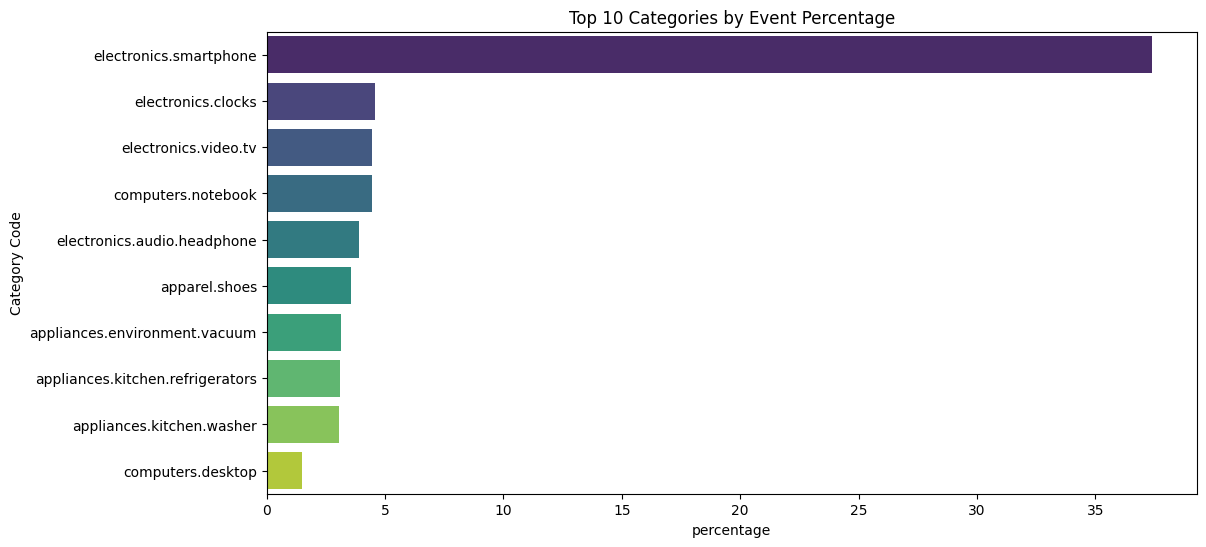

In [31]:
# barplot de las 10 categorias con mas eventos
plt.figure(figsize=(12, 6))
sns.barplot(x='percentage', y='category_code', data=category_counts.head(10), palette='viridis')
plt.title('Top 10 Categories by Event Percentage')
plt.xlabel('percentage')
plt.ylabel('Category Code')
plt.show()

In [35]:
#Buscar el top 10 de users_id con mas eventos
user_counts = df1['user_id'].value_counts().reset_index()
user_counts.columns = ['user_id', 'count']
user_counts['percentage'] = user_counts['count'] / user_counts['count'].sum()
user_counts.sort_values(by='count', ascending=False, inplace=True)
user_counts['percentage'] = user_counts['percentage'] * 100 

In [36]:
user_counts.head(10).round(2)

,user_id,count,percentage
0,568778435,22929,0.02
1,569335945,14810,0.01
2,512475445,13547,0.01
3,512365995,10055,0.01
4,568818636,6171,0.01
5,514649263,5779,0.01
6,512505687,5568,0.01
7,559249905,5394,0.00
8,512388419,5225,0.00
9,532769022,5014,0.00


In [37]:
# Cual es la distribucion por tipo de evento de los 10 usuarios con mas eventos
top_users = user_counts.head(10)['user_id']
top_users_df = df1[df1['user_id'].isin(top_users)]  
# Agrupar por 'user_id' y 'event_type' y contar los eventos
top_users_event_counts = top_users_df.groupby(['user_id', 'event_type']).size().reset_index(name='event_count')
# Pivotar el DataFrame para tener 'event_type' como columnas
top_users_event_counts_pivot = top_users_event_counts.pivot(index='user_id', columns='event_type', values='event_count').fillna(0)
top_users_event_counts_pivot.head(10)

event_type,cart,purchase,view
user_id,,,
512365995,18.0,0.0,10037.0
512388419,7.0,1.0,5217.0
512475445,2.0,0.0,13545.0
512505687,12.0,4.0,5552.0
514649263,1.0,0.0,5778.0
532769022,37.0,8.0,4969.0
559249905,3.0,0.0,5391.0
568778435,3.0,0.0,22926.0
568818636,0.0,0.0,6171.0


In [39]:
# De los usuarios que tienen views, cuantos anadieron al carito?
views_users = df1[df1['event_type'] == 'view']['user_id'].unique()
cart_users = df1[df1['event_type'] == 'cart']['user_id'].unique()
cart_users_count = len(cart_users)
views_users_count = len(views_users)
print(f"Total users with views: {views_users_count}")
print(f"Total users who added to cart: {cart_users_count}")
# Calcular el porcentaje de usuarios que añadieron al carrito de los que vieron
cart_percentage = (cart_users_count / views_users_count) * 100 if views_users_count > 0 else 0
print(f"Percentage of users who added to cart after viewing: {cart_percentage:.2f}%")

Total users with views: 5316128
Total users who added to cart: 1054133
Percentage of users who added to cart after viewing: 19.83%


In [40]:
# Cuantos de los que anadieron al carrito compraron?
cart_users = df1[df1['event_type'] == 'cart']['user_id'].unique()
purchase_users = df1[df1['event_type'] == 'purchase']['user_id'].unique()
cart_users_count = len(cart_users)
purchase_users_count = len(purchase_users)
print(f"Total users who added to cart: {cart_users_count}")
print(f"Total users who made a purchase: {purchase_users_count}")
# Calcular el porcentaje de usuarios que compraron de los que anadieron al carrito
purchase_percentage = (purchase_users_count / cart_users_count) * 100 if cart_users_count > 0 else 0
print(f"Percentage of users who made a purchase after adding to cart: {purchase_percentage:.2f}%")

Total users who added to cart: 1054133
Total users who made a purchase: 697470
Percentage of users who made a purchase after adding to cart: 66.17%


### Notas:
1.  Durante octubre y noviembre 2019, se registraron 109.950.742 eventos, de 5.316.649 clientes unicos
2.  Los valores Unicos de tipo de evento son 'view', 'cart' y 'purchase', con la siguiente proporcion:
    view        104335509
    cart          3955446
    purchase      1659788
    view        0.948930
    cart        0.035975
    purchase    0.015096
3. Las 10 marcas con mas eventos en esta tienda:
	brand	count	percentage
0	samsung	13172020	13.92
1	apple	10381933	10.97
2	xiaomi	7721825	8.16
3	huawei	2521331	2.66
4	lucente	1840936	1.95
5	lg	1659394	1.75
6	bosch	1532149	1.62
7	oppo	1294585	1.37
8	sony	1255101	1.33
9	acer	1127129	1.19
4. Las 10 categorias con mas eventos son:
category_code	count	percentage
0	electronics.smartphone	27882231	37.41
1	electronics.clocks	3397999	4.56
2	electronics.video.tv	3321796	4.46
3	computers.notebook	3318177	4.45
4	electronics.audio.headphone	2917065	3.91
5	apparel.shoes	2650791	3.56
6	appliances.environment.vacuum	2329728	3.13
7	appliances.kitchen.refrigerators	2314917	3.11
8	appliances.kitchen.washer	2273270	3.05
9	computers.desktop	1114744	1.50
5. Top 10 usuarios por evento
0	568778435	22929	0.02
1	569335945	14810	0.01
2	512475445	13547	0.01
3	512365995	10055	0.01
4	568818636	6171	0.01
5	514649263	5779	0.01
6	512505687	5568	0.01
7	559249905	5394	0.00
8	512388419	5225	0.00
9	532769022	5014	0.00
6. Cuantos de los que vieron agregaron al carrito?
Total users with views: 5316128
Total users who added to cart: 1054133
Percentage of users who added to cart after viewing: 19.83%
7. Cuantos de los que anadieron al carrito efectivamente compraron?
Total users who added to cart: 1054133
Total users who made a purchase: 697470
Percentage of users who made a purchase after adding to cart: 66.17%

In [4]:
df2 = pd.read_csv('/Users/jluisfeltrer/Desktop/Analisis de datos/data_analysis_curso/e-cmn/E-commerce_mkechinov/merged_2019_C1.csv')

In [42]:
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
# Elimina las columnas de 'user_session', 'product_id', 'category_id' in place true
df2.drop(columns=['user_session', 'product_id', 'category_id'], inplace=True)

In [44]:
df2.head()

,event_time,event_type,category_code,brand,price,user_id
0,2019-11-01 00:00:00 UTC,view,electronics.smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:00 UTC,view,appliances.sewing_machine,janome,293.65,530496790
2,2019-11-01 00:00:01 UTC,view,NaN,creed,28.31,561587266
3,2019-11-01 00:00:01 UTC,view,appliances.kitchen.washer,lg,712.87,518085591
4,2019-11-01 00:00:01 UTC,view,electronics.smartphone,xiaomi,183.27,558856683


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   category_code  object 
 3   brand          object 
 4   price          float64
 5   user_id        int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ GB


In [6]:
# Transformar la columna 'event_time' a datetime
df2['event_time'] = pd.to_datetime(df2['event_time'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S')
df2.head()

,event_time,event_type,category_code,brand,price,user_id
0,2019-11-01 00:00:00,view,electronics.smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:00,view,appliances.sewing_machine,janome,293.65,530496790
2,2019-11-01 00:00:01,view,NaN,creed,28.31,561587266
3,2019-11-01 00:00:01,view,appliances.kitchen.washer,lg,712.87,518085591
4,2019-11-01 00:00:01,view,electronics.smartphone,xiaomi,183.27,558856683


In [48]:
# Agrupa los datos por evento en relacion a event_time, en las siguientes categorias: 'view', 'cart', 'purchase' y en categorias de tiempo de 12:00 a 06:00, 06:00 a 12:00, 12:00 a 18:00, 18:00 a 24:00
df2['time_category'] = pd.cut(df2['event_time'].dt.hour, bins=[-1, 5, 11, 17, 23], labels=['12:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00'], right=True) 
# Agrupa los datos por 'event_type' y 'time_category' y cuenta los eventos
event_time_counts = df2.groupby(['event_type', 'time_category']).size().reset_index(name='event_count')
# Pivotar el DataFrame para tener 'time_category' como columnas
event_time_counts_pivot = event_time_counts.pivot(index='event_type', columns='time_category', values='event_count').fillna(0)  
# Mostrar el DataFrame resultante
event_time_counts_pivot.head()

/var/folders/kw/4wrh588x7g5_4x1y7pjyp2c40000gn/T/ipykernel_43354/453430401.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_time_counts = df2.groupby(['event_type', 'time_category']).size().reset_index(name='event_count')


time_category,12:00-06:00,06:00-12:00,12:00-18:00,18:00-24:00
event_type,,,,
cart,742126,1505820,1295100,412400
purchase,283273,701146,547230,128139
view,18379847,33323796,39308198,13323668


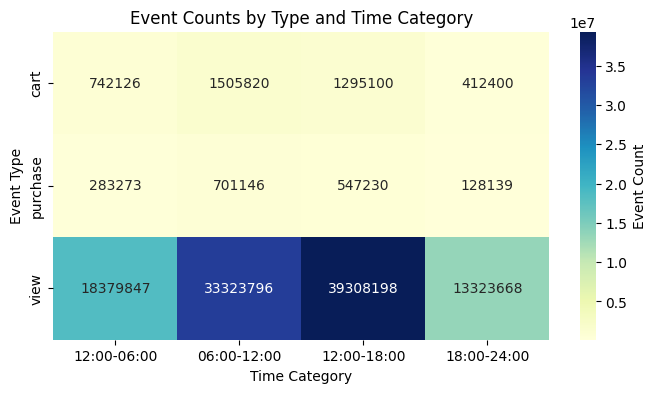

In [50]:
#grafica esta tabla como un heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(event_time_counts_pivot, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Event Count'})
plt.title('Event Counts by Type and Time Category')
plt.xlabel('Time Category')
plt.ylabel('Event Type')
plt.show()

In [51]:
# suma los valores de la columna 'price' por 'event_type'
price_sum = df2.groupby('event_type')['price'].sum().reset_index()
price_sum.columns = ['event_type', 'total_price']
price_sum.sort_values(by='total_price', ascending=False, inplace=True)
price_sum.head(10).round(2)


,event_type,total_price
2,view,3.037270e+10
0,cart,1.187608e+09
1,purchase,5.051524e+08


In [7]:
# Crear un perfil de usuarios con las siguientes columnas: 'user_id', 'event_type', 'brand', 'category_code', 'price', 'event_time', y conviertelo en datafraame (df_profile)
df_profile = df2[['user_id', 'event_type', 'brand', 'category_code', 'price', 'event_time']].copy()



In [8]:
df_profile.head()

,user_id,event_type,brand,category_code,price,event_time
0,520088904,view,xiaomi,electronics.smartphone,489.07,2019-11-01 00:00:00
1,530496790,view,janome,appliances.sewing_machine,293.65,2019-11-01 00:00:00
2,561587266,view,creed,NaN,28.31,2019-11-01 00:00:01
3,518085591,view,lg,appliances.kitchen.washer,712.87,2019-11-01 00:00:01
4,558856683,view,xiaomi,electronics.smartphone,183.27,2019-11-01 00:00:01


In [9]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   event_type     object        
 2   brand          object        
 3   category_code  object        
 4   price          float64       
 5   event_time     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.9+ GB


In [10]:
# Agrupa los datos por 'user_id' y 'event_type', y cuenta los eventos
user_event_counts = df_profile.groupby(['user_id', 'event_type']).size().reset_index(name='event_count')
# Pivotar el DataFrame para tener 'event_type' como columnas
user_event_counts_pivot = user_event_counts.pivot(index='user_id', columns='event_type', values='event_count').fillna(0)
user_event_counts_pivot.head(10)    


event_type,cart,purchase,view
user_id,,,
10300217,0.0,0.0,1.0
29515875,0.0,0.0,11.0
31198833,0.0,0.0,20.0
33869381,0.0,0.0,1.0
34916060,0.0,0.0,1.0
41798457,0.0,0.0,1.0
42896738,0.0,0.0,3.0
43295513,0.0,0.0,1.0
44378150,0.0,0.0,1.0


In [11]:
# Agrega una columna 'convertion rate' que sea la relacion entre el numero de eventos de compra y el numero de eventos de vista
user_event_counts_pivot['conversion_rate'] = user_event_counts_pivot.get('purchase', 0) / user_event_counts_pivot.get('view', 1) * 100  

user_event_counts_pivot.head(10)

event_type,cart,purchase,view,conversion_rate
user_id,,,,
10300217,0.0,0.0,1.0,0.0
29515875,0.0,0.0,11.0,0.0
31198833,0.0,0.0,20.0,0.0
33869381,0.0,0.0,1.0,0.0
34916060,0.0,0.0,1.0,0.0
41798457,0.0,0.0,1.0,0.0
42896738,0.0,0.0,3.0,0.0
43295513,0.0,0.0,1.0,0.0
44378150,0.0,0.0,1.0,0.0


In [12]:
user_event_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7067731 entries, 0 to 7067730
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   event_type   object
 2   event_count  int64 
dtypes: int64(2), object(1)
memory usage: 161.8+ MB
